In [1]:
import pandas as pd
import os 
import numpy as np
os.chdir("C:\\Users\\tirth\\Technocolabs\\Project task2\\Data set")

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls')

## Basic Data Integrity

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [7]:
df['ID'].nunique()

29687

In [8]:
id_counts = df['ID'].value_counts()
id_counts.head()

54ada30b-750f    2
0170086d-7472    2
3393c9e4-3345    2
91c69d1a-8732    2
315e4f9d-2b0b    2
Name: ID, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [10]:
np.random.seed(seed=1)
random_integers = np.random.randint(low =1 , high=5 ,size=100)
n = random_integers==3
print(n[:5])
sum(n)
random_integers[n]

[False False False False False]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [11]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

54ada30b-750f    True
0170086d-7472    True
3393c9e4-3345    True
91c69d1a-8732    True
315e4f9d-2b0b    True
Name: ID, dtype: bool

In [12]:
id_counts.index[0:5]

Index(['54ada30b-750f', '0170086d-7472', '3393c9e4-3345', '91c69d1a-8732',
       '315e4f9d-2b0b'],
      dtype='object')

In [13]:
dupe_ids = id_counts.index[dupe_mask]

dupe_ids = list(dupe_ids)
len(dupe_ids)


313

In [14]:
dupe_ids[0:5]

['54ada30b-750f',
 '0170086d-7472',
 '3393c9e4-3345',
 '91c69d1a-8732',
 '315e4f9d-2b0b']

In [15]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
21872,0170086d-7472,100000,2,1,1,25,0,0,-1,0,...,52079,40183,35796,28,103350,1722,1100,1300,2000,0
21972,0170086d-7472,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24873,3393c9e4-3345,70000,1,2,1,36,Not available,2,2,2,...,32100,34557,35357,0,3400,0,3000,1500,1500,1
24973,3393c9e4-3345,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27605,54ada30b-750f,150000,2,2,1,26,0,0,0,0,...,77659,15525,0,2481,4263,8900,0,0,0,0
27705,54ada30b-750f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_zero_mask = df == 0

In [17]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

In [18]:
df_clean1 = df.loc[~feature_zero_mask,:].copy()
df_clean1.shape

(29685, 25)

In [19]:
df_clean1['ID'].nunique()

29685

## Exploring and Cleaning Data

In [20]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [21]:
df_clean1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [22]:
df_clean1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [23]:
valid_pay1_mask = df_clean1['PAY_1'] != 'Not available'
valid_pay1_mask[0:5]
sum(valid_pay1_mask)

26664

In [24]:
df_clean2 = df_clean1.loc[valid_pay1_mask,:].copy()
df_clean2.shape

(26664, 25)

In [25]:
df_clean2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [26]:
df_clean2['PAY_1'] = df_clean2['PAY_1'].astype('int64')
df_clean2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


## Exploring Credit Card Limits and Demographic Features

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.dpi']=250

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BB2361C970>,
      dtype=object)

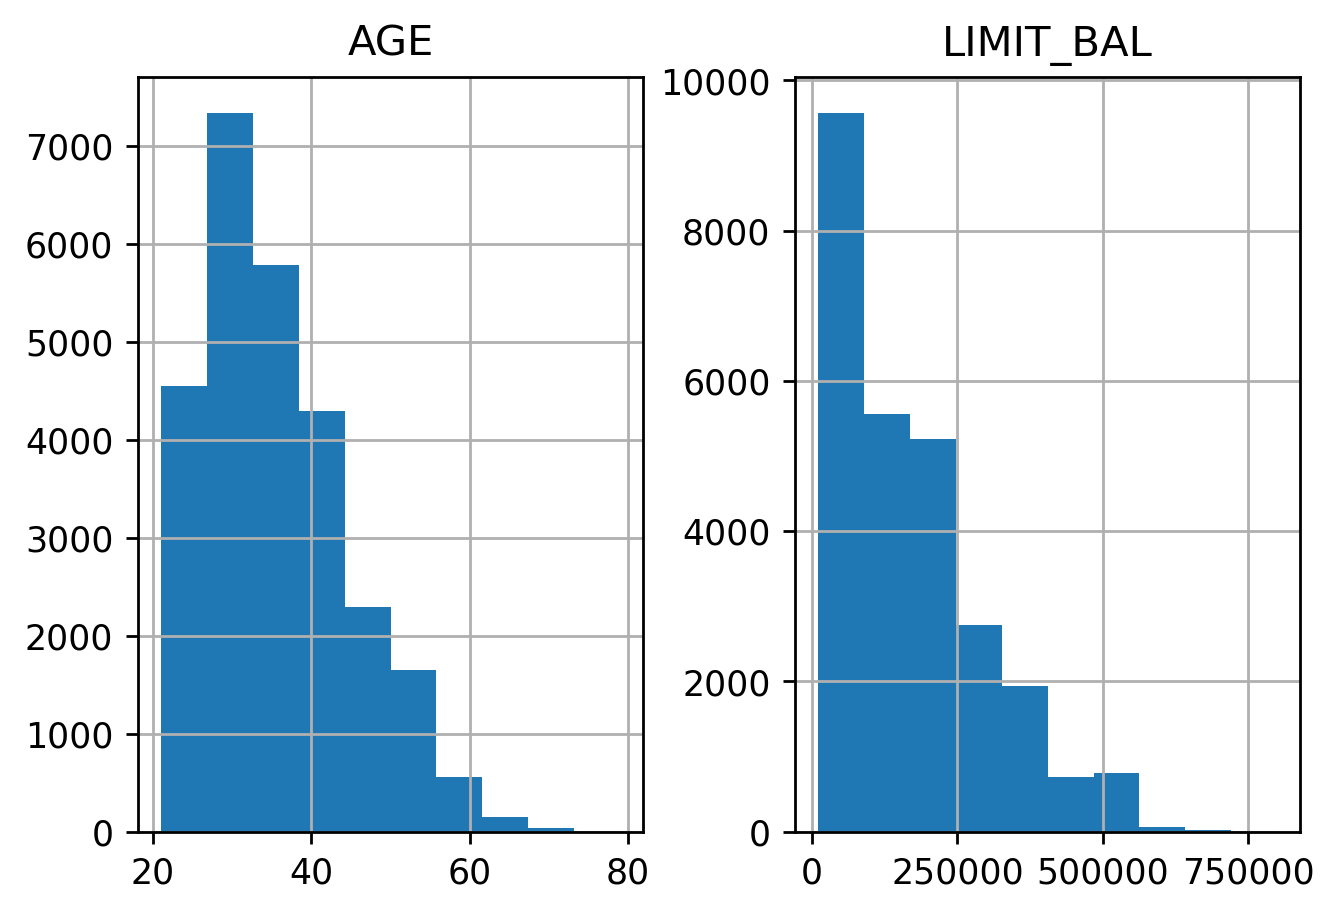

In [28]:
df_clean2[['LIMIT_BAL','AGE']].hist()

In [29]:
df_clean2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [30]:
df_clean2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [31]:
df_clean2['EDUCATION'].replace(to_replace=[0,5,6],value=4,inplace=True)
df_clean2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [32]:
df_clean2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [33]:
df_clean2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Categorical Features Exploration

Text(0.5, 0, 'Education level: ordinal encoding')

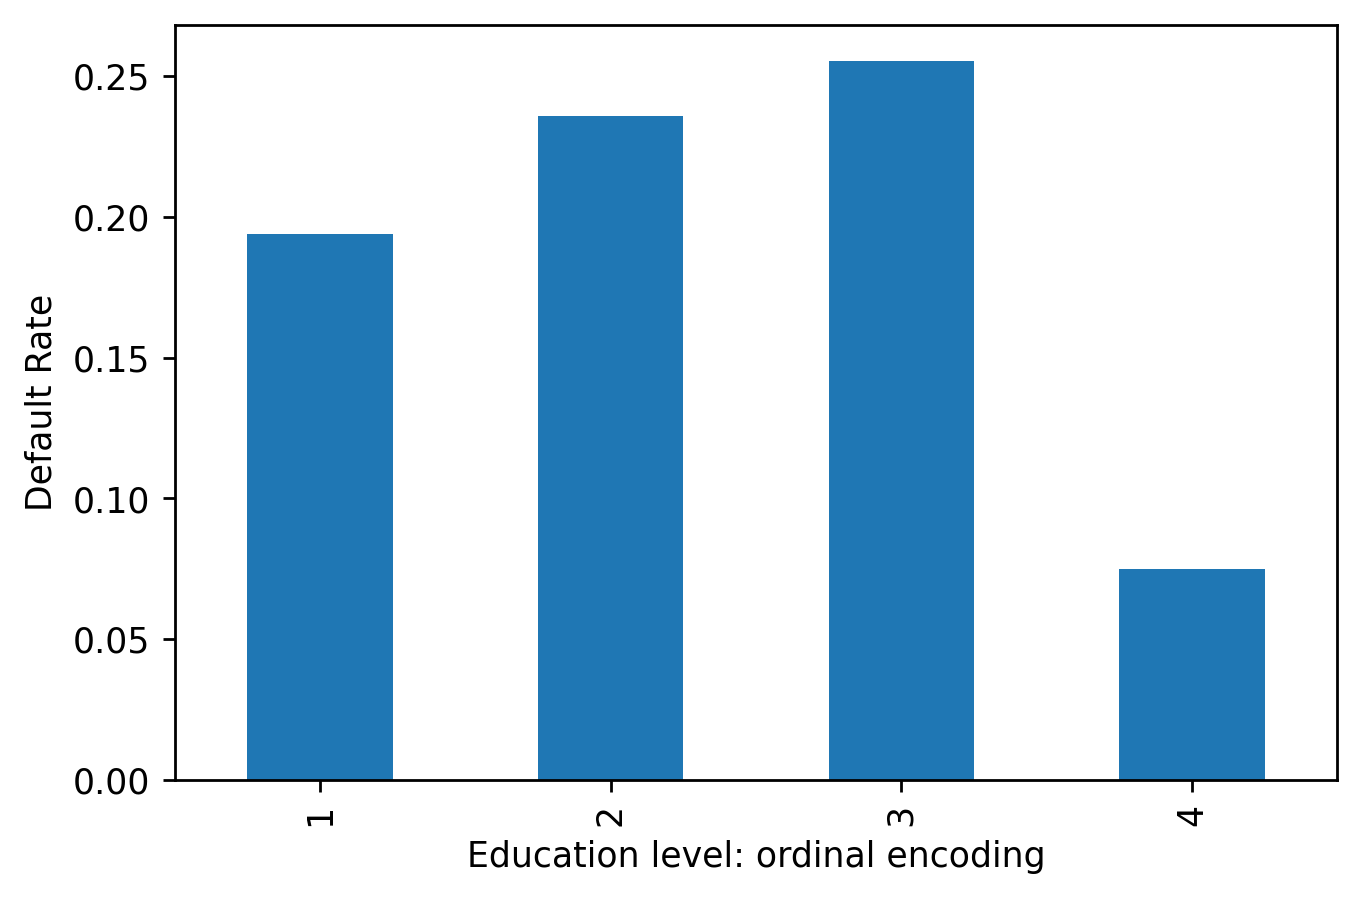

In [34]:
df_clean2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default Rate')
plt.xlabel('Education level: ordinal encoding')

## Implementing OHE for categorical features

In [35]:
df_clean2['EDUCATION_CAT']='none'

In [36]:
df_clean2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [37]:
mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

In [38]:
df_clean2['EDUCATION_CAT'] = df_clean2['EDUCATION'].map(mapping)
df_clean2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [39]:
edu_ohe = pd.get_dummies(df_clean2['EDUCATION_CAT'])
edu_ohe.head()

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [40]:
df_with_ohe = pd.concat([df_clean2,edu_ohe],axis=1)
df_with_ohe[['EDUCATION_CAT','graduate school','high school','university','others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [41]:
df_with_ohe.to_csv("clean_data.csv",index=False)

## Exploring Financial History

In [42]:
df = pd.read_csv("clean_data.csv")

In [43]:
pay_feature = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [44]:
df[pay_feature].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [45]:
df[pay_feature[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

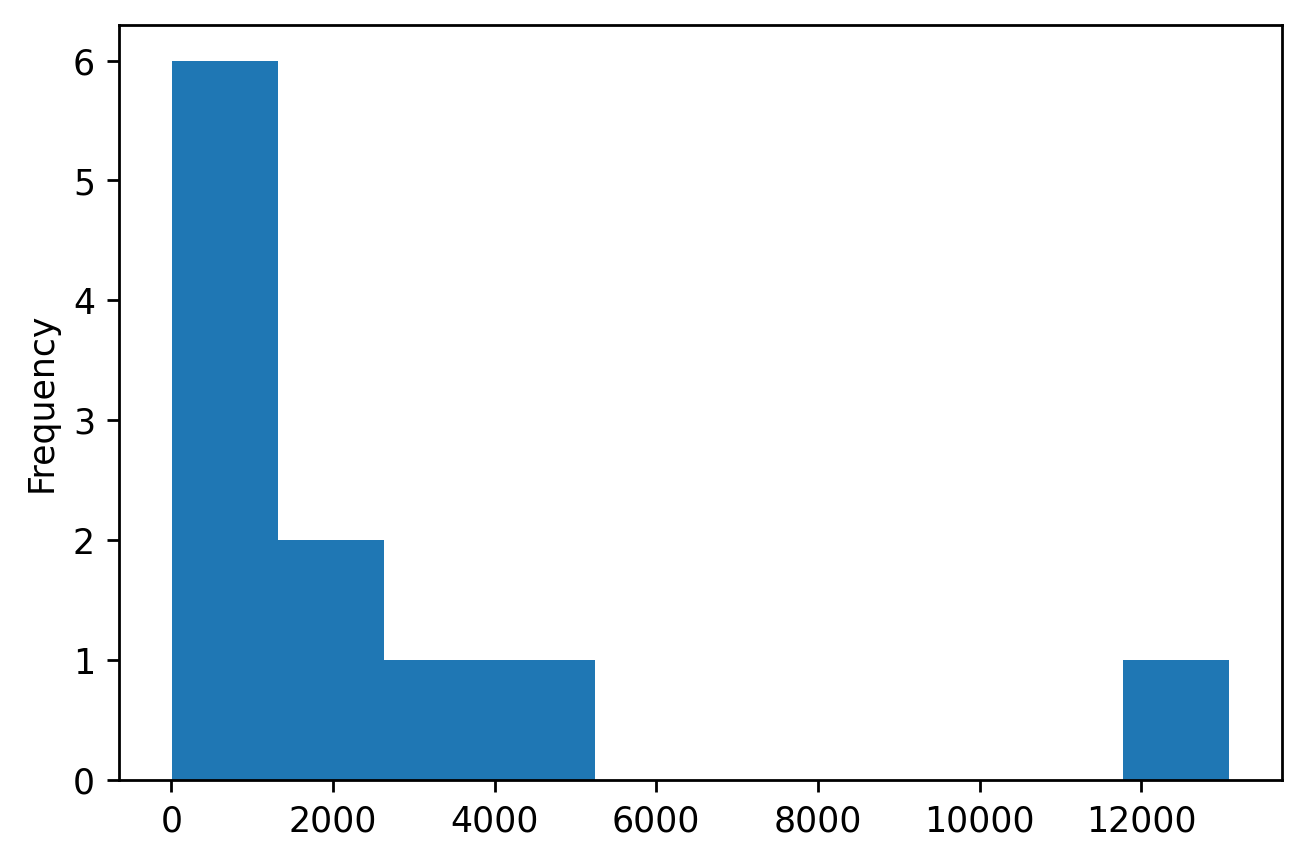

In [46]:
df[pay_feature[0]].value_counts().sort_index().plot(kind='hist')

In [47]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of Accounts')

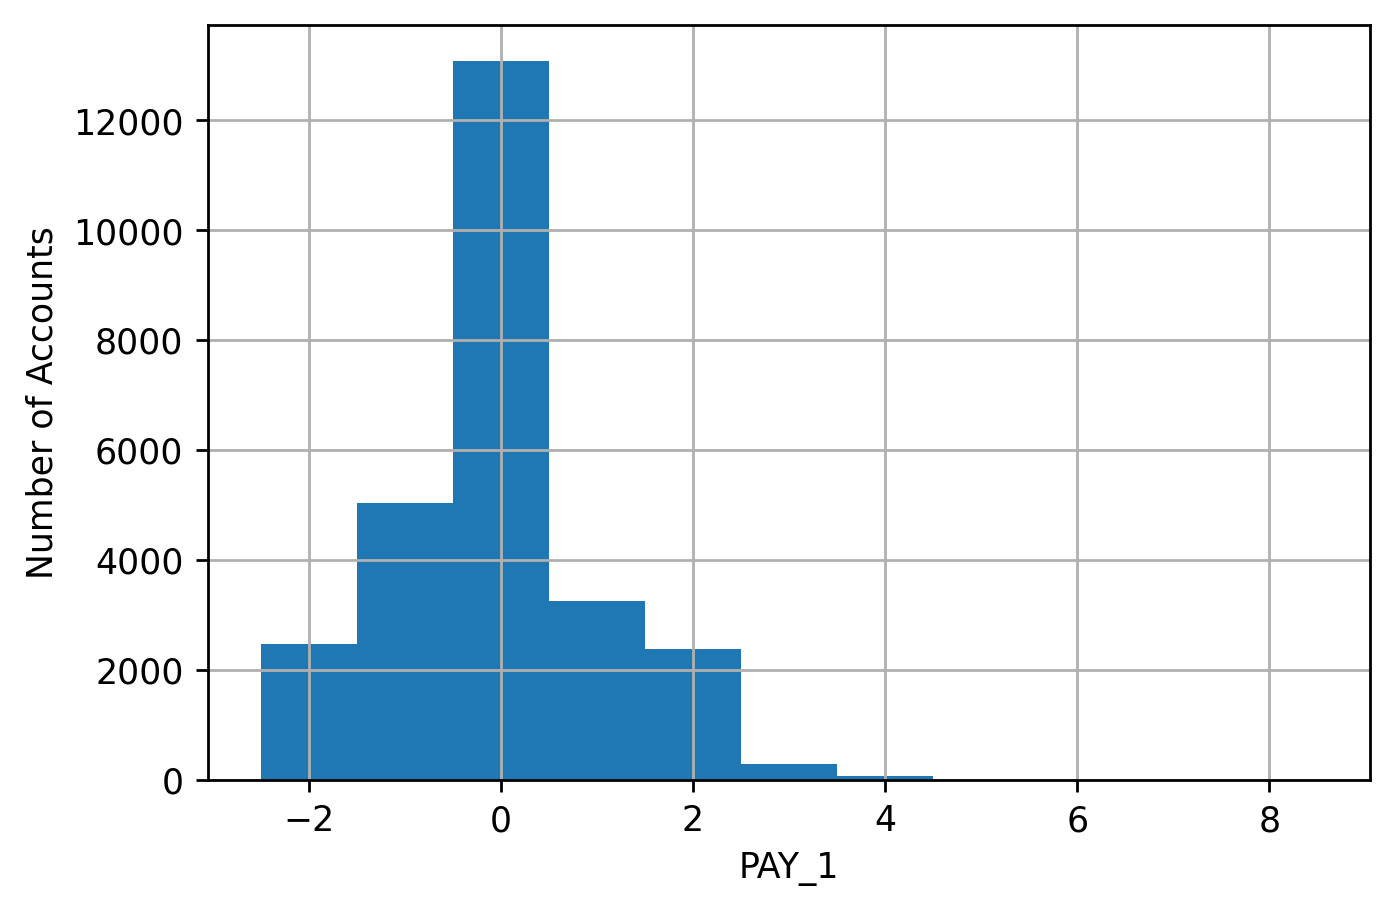

In [48]:
df[pay_feature[0]].hist(bins = pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of Accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BB25F32220>,
      dtype=object)

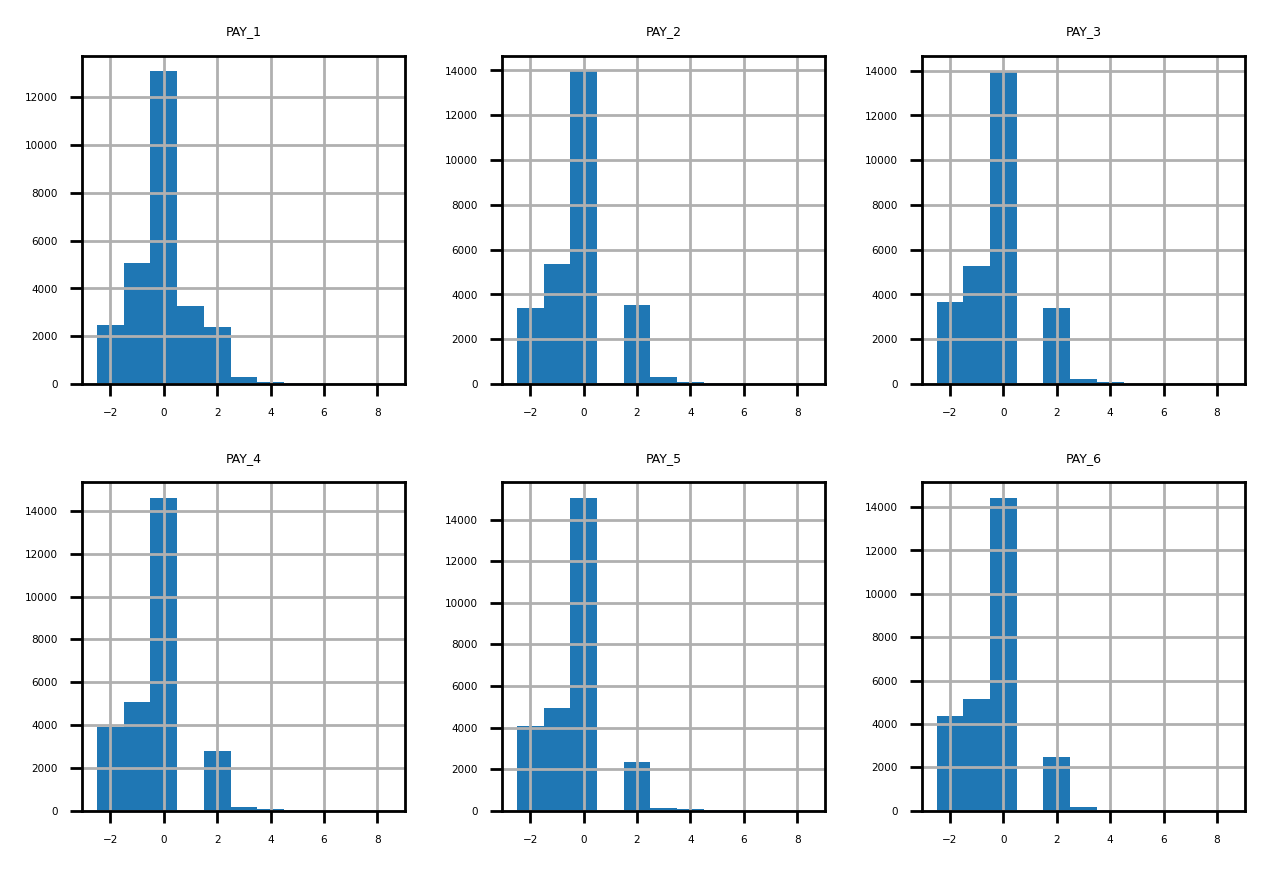

In [49]:
plt.rcParams['font.size'] = 3
df[pay_feature].hist(bins = pay_1_bins,layout=(2,3))

In [50]:
df.loc[df['PAY_2']==2, ['PAY_2','PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
